In [2]:
# importing neccessery libriries
# importing neccessery libriries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss

from matplotlib.colors import LinearSegmentedColormap

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import cohen_kappa_score

# Find out why you are not working good with high wines

In [3]:
df = pd.read_csv('white_wine_ml.csv')
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality_label,wine_type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,medium,white wine
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,medium,white wine
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,medium,white wine
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,medium,white wine
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,medium,white wine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,medium,white wine
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,low,white wine
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,medium,white wine
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,medium,white wine


In [4]:
df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'quality_label', 'wine_type'],
      dtype='object')

In [5]:
df.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
quality_label           0
wine_type               0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         4898 non-null   float64
 1   volatile_acidity      4898 non-null   float64
 2   citric_acid           4898 non-null   float64
 3   residual_sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free_sulfur_dioxide   4898 non-null   float64
 6   total_sulfur_dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
 12  quality_label         4898 non-null   object 
 13  wine_type             4898 non-null   object 
dtypes: float64(11), int64(1), object(2)
memory usage: 535.8+ KB


In [7]:
df.duplicated().sum()

np.int64(937)

In [8]:
string_col = df.select_dtypes(include="object").columns
df[string_col].head(20)

,quality_label,wine_type
0,medium,white wine
1,medium,white wine
2,medium,white wine
3,medium,white wine
4,medium,white wine
5,medium,white wine
6,medium,white wine
7,medium,white wine
8,medium,white wine
9,medium,white wine


# Machine starts

In [9]:
dfm = df.copy()

# No Otuliers

In [10]:
# q1 = dfm.fixed_acidity.quantile([0.25])
# q3 = dfm.fixed_acidity.quantile([0.75])
# print(q1)
# print(q3)

q1fa = np.percentile(dfm.fixed_acidity, 25)
q3fa = np.percentile(dfm.fixed_acidity, 75)
print(q1fa)
print(q3fa)
iqrfa = q3fa - q1fa
print(iqrfa)
lower_treshold_fa = q1fa - (1.5*iqrfa)
print(lower_treshold_fa)
higher_treshold_fa = q3fa + (1.5*iqrfa)
print(higher_treshold_fa)
print('----------')
# q1 = dfm.fixed_acidity.quantile([0.25])
# q3 = dfm.fixed_acidity.quantile([0.75])
# print(q1)
# print(q3)

q1cl = np.percentile(dfm.chlorides, 25)
q3cl = np.percentile(dfm.chlorides, 75)
print(q1cl)
print(q3cl)
iqrcl = q3cl - q1cl
print(iqrcl)
lower_treshold_cl = q1cl - (1.5*iqrcl)
print(lower_treshold_cl)
higher_treshold_cl = q3cl + (1.5*iqrcl)
print(higher_treshold_cl)
print('----------')
# q1 = dfm.fixed_acidity.quantile([0.25])
# q3 = dfm.fixed_acidity.quantile([0.75])
# print(q1)
# print(q3)

q1su = np.percentile(dfm.sulphates, 25)
q3su = np.percentile(dfm.sulphates, 75)
print(q1su)
print(q3su)
iqrsu = q3su - q1su
print(iqrsu)
lower_treshold_su = q1su - (1.5*iqrsu)
print(lower_treshold_su)
higher_treshold_su = q3su + (1.5*iqrsu)
print(higher_treshold_su)


6.3
7.3
1.0
4.8
8.8
----------
0.036
0.05
0.014000000000000005
0.014999999999999989
0.07100000000000001
----------
0.41
0.55
0.14000000000000007
0.19999999999999987
0.7600000000000001


In [11]:
# dfm_clean = dfm[
#     (dfm['fixed_acidity'] >= lower_treshold_fa) & (dfm['fixed_acidity'] <= higher_treshold_fa) &
#     (df['chlorides'] >= lower_treshold_cl) & (df['chlorides'] <= higher_treshold_cl) &
#     (df['sulphates'] >= lower_treshold_su) & (df['sulphates'] <= higher_treshold_su)
# ]
# dfm_clean.head()

dfm_clean = dfm[
    (dfm['fixed_acidity'] >= lower_treshold_fa) & (dfm['fixed_acidity'] <= higher_treshold_fa)
]
dfm_clean = dfm[
    (df['chlorides'] >= lower_treshold_cl) & (df['chlorides'] <= higher_treshold_cl)
]
dfm_clean = dfm[
    (df['sulphates'] >= lower_treshold_su) & (df['sulphates'] <= higher_treshold_su)
]

dfm_clean.head(20)
dfm.info()
print('---')
dfm_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         4898 non-null   float64
 1   volatile_acidity      4898 non-null   float64
 2   citric_acid           4898 non-null   float64
 3   residual_sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free_sulfur_dioxide   4898 non-null   float64
 6   total_sulfur_dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
 12  quality_label         4898 non-null   object 
 13  wine_type             4898 non-null   object 
dtypes: float64(11), int64(1), object(2)
memory usage: 535.8+ KB
---
<class '

# Machine

In [12]:
dfm_clean['quality_label'].replace({'low':0, 'medium':1, 'high':2}, inplace=True)
# I actually should drop wine type as we do not need it. 
# dfm.drop('quality_label', axis=1)
dfm_clean['wine_type'].replace({'white wine':1, 'red wine':0}, inplace=True)

/var/folders/pm/7vn7thz14p556cr_ql9w5xbw0000gn/T/ipykernel_41030/4137651370.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfm_clean['quality_label'].replace({'low':0, 'medium':1, 'high':2}, inplace=True)
/var/folders/pm/7vn7thz14p556cr_ql9w5xbw0000gn/T/ipykernel_41030/4137651370.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('fu

In [13]:
from sklearn.model_selection import train_test_split, GridSearchCV

# split data into X and Y
X = dfm_clean.drop(['quality_label', 'quality', 'density', 'chlorides', 'wine_type', 'free_sulfur_dioxide', 'pH', 'sulphates', 'free_sulfur_dioxide'], axis=1)
y = dfm_clean['quality_label']

# split data
# x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=12)

In [14]:
y_test.shape

(955,)

In [15]:
x_test.shape

(955, 6)

# Build Models

# Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression

# LogisticRegression model
LR_model = LogisticRegression(random_state=42, max_iter=100)
# fit model
LR_model.fit(x_train, y_train)
# predictions
preds = LR_model.predict(x_test)
from sklearn.metrics import mean_squared_error, accuracy_score # rmse root mean square error

acc_LR = accuracy_score(y_test, preds)
print(acc_LR)

0.6607329842931937


/opt/anaconda3/envs/MarcosPython10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Decision Tree Classifier

In [17]:
from sklearn.tree import DecisionTreeClassifier

DTC_model = DecisionTreeClassifier(random_state=42)

# fit model
DTC_model.fit(x_train, y_train)

# predictions
preds = DTC_model.predict(x_test)

from sklearn.metrics import mean_squared_error, accuracy_score # rmse root mean square error

acc_DTC = accuracy_score(y_test, preds)
print(acc_DTC)

0.7130890052356021


# Gaussian NB

In [18]:

from sklearn.naive_bayes import GaussianNB

GNB_model = GaussianNB()

# fit model
GNB_model.fit(x_train, y_train)

# predictions
preds = GNB_model.predict(x_test)

from sklearn.metrics import mean_squared_error, accuracy_score # rmse root mean square error

acc_GNB = accuracy_score(y_test, preds)
print(acc_GNB)

0.6890052356020943


# Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier
# Random Forest Classifier model
RF_clf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state=101)
# fit model
RF_clf.fit(x_train, y_train)
# predictions
preds = RF_clf.predict(x_test)
# accuracy
acc_RF = accuracy_score(y_test, preds)
print(acc_RF)

0.8083769633507853


# SVC Model

In [20]:
from sklearn.svm import SVC

SVC_model = SVC(random_state=42)

# fit model
SVC_model.fit(x_train, y_train)

# predictions
preds = SVC_model.predict(x_test)

from sklearn.metrics import mean_squared_error, accuracy_score # rmse root mean square error

acc_SVC = accuracy_score(y_test, preds)
print(acc_SVC)

0.6282722513089005


# K Neighbours Classifier

In [21]:
from sklearn.neighbors import KNeighborsClassifier

KNC_model = KNeighborsClassifier(n_neighbors=5)

# fit model
KNC_model.fit(x_train, y_train)

# predictions
preds = KNC_model.predict(x_test)

from sklearn.metrics import mean_squared_error, accuracy_score # rmse root mean square error

acc_KNC = accuracy_score(y_test, preds)
print(acc_KNC)


0.6795811518324607


# ADA Boost Classifier

In [22]:
from sklearn.ensemble import AdaBoostClassifier

ABC_model = AdaBoostClassifier(n_estimators=50)

# fit model
ABC_model.fit(x_train, y_train)

# predictions
preds = ABC_model.predict(x_test)

from sklearn.metrics import mean_squared_error, accuracy_score # rmse root mean square error

acc_ABC = accuracy_score(y_test, preds)
print(acc_ABC)


0.7151832460732984


# MLPClassifier (Neural Network)


In [23]:
from sklearn.neural_network import MLPClassifier

MLPC_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300)

# fit model
MLPC_model.fit(x_train, y_train)

# predictions
preds = MLPC_model.predict(x_test)

from sklearn.metrics import mean_squared_error, accuracy_score # rmse root mean square error

acc_MLPC = accuracy_score(y_test, preds)
print(acc_MLPC)

0.6900523560209424


# Testing For Loop

Training LR...
Accuracy for LR: 0.6607
Cohen's Kappa for LR: 0.2136
              precision    recall  f1-score   support

         low       0.57      0.34      0.42       317
      medium       0.68      0.88      0.77       598
        high       0.00      0.00      0.00        40

    accuracy                           0.66       955
   macro avg       0.42      0.40      0.40       955
weighted avg       0.62      0.66      0.62       955

-------
ROC AUC for LR: 0.7068
Log Loss for LR: 0.7030


/opt/anaconda3/envs/MarcosPython10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/MarcosPython10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/anaconda3/envs/MarcosPython10/lib/python3

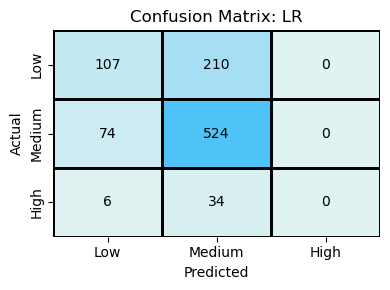

Training DTC...
Accuracy for DTC: 0.7131
Cohen's Kappa for DTC: 0.4233
              precision    recall  f1-score   support

         low       0.62      0.61      0.61       317
      medium       0.78      0.77      0.77       598
        high       0.55      0.60      0.57        40

    accuracy                           0.71       955
   macro avg       0.65      0.66      0.65       955
weighted avg       0.71      0.71      0.71       955

-------
ROC AUC for DTC: 0.7335
Log Loss for DTC: 10.3413


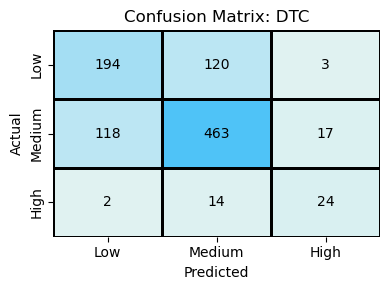

Training GNB...
Accuracy for GNB: 0.6890
Cohen's Kappa for GNB: 0.3330
              precision    recall  f1-score   support

         low       0.60      0.56      0.58       317
      medium       0.73      0.80      0.76       598
        high       0.50      0.03      0.05        40

    accuracy                           0.69       955
   macro avg       0.61      0.46      0.46       955
weighted avg       0.68      0.69      0.67       955

-------
ROC AUC for GNB: 0.7546
Log Loss for GNB: 0.6981


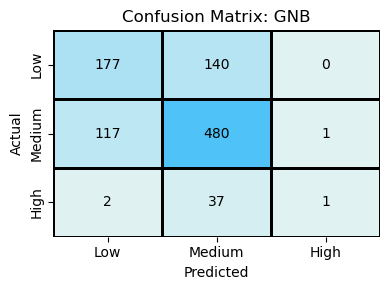

Training RF...
Accuracy for RF: 0.8000
Cohen's Kappa for RF: 0.5788
              precision    recall  f1-score   support

         low       0.75      0.69      0.72       317
      medium       0.82      0.88      0.85       598
        high       1.00      0.47      0.64        40

    accuracy                           0.80       955
   macro avg       0.86      0.68      0.74       955
weighted avg       0.80      0.80      0.80       955

-------
ROC AUC for RF: 0.8893
Log Loss for RF: 0.5067


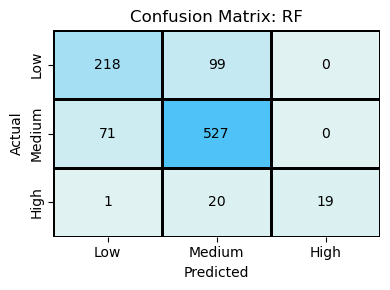

Training SVC...
Accuracy for SVC: 0.6283
Cohen's Kappa for SVC: 0.0072
              precision    recall  f1-score   support

         low       1.00      0.01      0.01       317
      medium       0.63      1.00      0.77       598
        high       0.00      0.00      0.00        40

    accuracy                           0.63       955
   macro avg       0.54      0.34      0.26       955
weighted avg       0.72      0.63      0.49       955

-------
ROC AUC for SVC: 0.7076
Log Loss for SVC: 0.7397


/opt/anaconda3/envs/MarcosPython10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/anaconda3/envs/MarcosPython10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/anaconda3/envs/MarcosPython10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.c

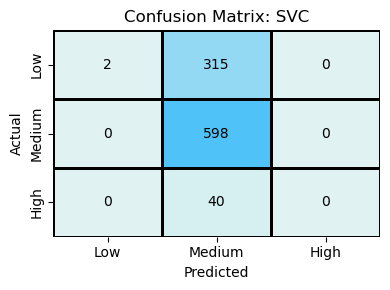

Training KNC...
Accuracy for KNC: 0.6796
Cohen's Kappa for KNC: 0.3186
              precision    recall  f1-score   support

         low       0.58      0.54      0.56       317
      medium       0.73      0.79      0.76       598
        high       0.71      0.12      0.21        40

    accuracy                           0.68       955
   macro avg       0.67      0.49      0.51       955
weighted avg       0.68      0.68      0.67       955

-------
ROC AUC for KNC: 0.7418
Log Loss for KNC: 2.3044


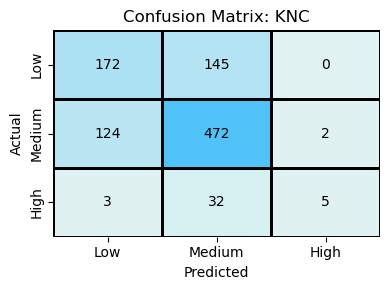

Training MLPC...
Accuracy for MLPC: 0.6764
Cohen's Kappa for MLPC: 0.2234
              precision    recall  f1-score   support

         low       0.67      0.29      0.41       317
      medium       0.68      0.92      0.78       598
        high       0.00      0.00      0.00        40

    accuracy                           0.68       955
   macro avg       0.45      0.41      0.40       955
weighted avg       0.65      0.68      0.63       955

-------
ROC AUC for MLPC: 0.7487
Log Loss for MLPC: 0.6693


/opt/anaconda3/envs/MarcosPython10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/anaconda3/envs/MarcosPython10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/anaconda3/envs/MarcosPython10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.c

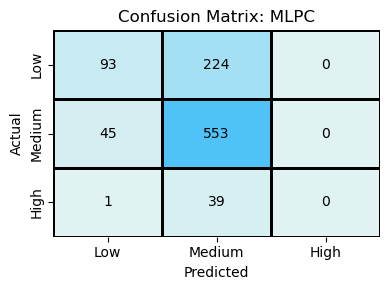

Summary of Cohen's Kappa scores:
LR has Fair agreement with a Kappa value of 0.21363620191012545
DTC has Good agreement with a Kappa value of 0.4232799451645394
GNB has Fair agreement with a Kappa value of 0.33297979667330635
RF has Good agreement with a Kappa value of 0.5787676057151171
SVC has Poor agreement with a Kappa value of 0.007238716591946526
KNC has Fair agreement with a Kappa value of 0.318588816863312
MLPC has Fair agreement with a Kappa value of 0.223421948767612
Summary of ROC AUC scores:
LR has a Good ROC AUC score of 0.7030
DTC has a Poor ROC AUC score of 10.3413 (high loss)
GNB has a Good ROC AUC score of 0.6981
RF has a Good ROC AUC score of 0.5067
SVC has a Good ROC AUC score of 0.7397
KNC has a Poor ROC AUC score of 2.3044 (high loss)
MLPC has a Good ROC AUC score of 0.6693
Summary of Log Loss scores:
LR has a Good Log Loss score of 0.7068
DTC has a Good Log Loss score of 0.7335
GNB has a Good Log Loss score of 0.7546
RF has a Very Good Log Loss score of 0.8893
SVC

In [24]:
models = {
    'LR': LogisticRegression(random_state=42, max_iter=100),
    'DTC': DecisionTreeClassifier(random_state=42),
    'GNB': GaussianNB(),
    'RF': RandomForestClassifier(random_state=42),
    'SVC': SVC(probability=True, random_state=42),  # set probability=True for roc_auc_score
    'KNC': KNeighborsClassifier(),
    'MLPC': MLPClassifier(random_state=42, max_iter=300),
}

kappa_scores = {}
roc_auc_scores = {}
log_loss_scores = {}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(x_train, y_train)

    preds = model.predict(x_test)
    acc = accuracy_score(y_test, preds)
    kappa = cohen_kappa_score(y_test, preds)

    print(f"Accuracy for {name}: {acc:.4f}")
    print(f"Cohen's Kappa for {name}: {kappa:.4f}")
    print(classification_report(y_test, preds, target_names=["low", "medium", "high"]))
    print('-------')

    kappa_scores[name] = kappa

    if hasattr(model, "predict_proba"):
        probs = model.predict_proba(x_test)
        try:
            roc_auc = roc_auc_score(y_test, probs, multi_class='ovr')
            print(f"ROC AUC for {name}: {roc_auc:.4f}")
            roc_auc_scores[name] = roc_auc
            loss = log_loss(y_test, probs)
            log_loss_scores[name] = loss
            print(f"Log Loss for {name}: {loss:.4f}")
        except Exception as e:
            print(f"Could not calculate ROC AUC and Log Loss for {name}: {e}")
    else:
        print(f"{name} does not support predict_proba, skipping ROC AUC.")

    print('=====================')
    
    cm = confusion_matrix(y_test, preds)
    cm_df = pd.DataFrame(cm, index=["Low", "Medium", "High"], columns=["Low", "Medium", "High"])
    
    light_blues = LinearSegmentedColormap.from_list("light_blues", ["#E0F2F1", "#4FC3F7"])


    plt.figure(figsize=(4, 3))
    sns.heatmap(cm_df, annot=True, fmt='d', cmap=light_blues, cbar=False, linewidths=.8, linecolor='black', annot_kws={"color": "black"})
    plt.title(f'Confusion Matrix: {name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.tight_layout()
    plt.show()
    
    print('=====================')

print("Summary of Cohen's Kappa scores:")
for name, score in kappa_scores.items():
    if score < 0.20:
        print(f'{name} has Poor agreement with a Kappa value of {score}') 
    elif 0.20 <= score < 0.40:
        print(f'{name} has Fair agreement with a Kappa value of {score}') 
    elif 0.40 <= score < 0.60:
        print(f'{name} has Good agreement with a Kappa value of {score}')
    else:
        print(f'{name} has Very good agreement with a Kappa value of {score}') 


print('=====================')


print("Summary of ROC AUC scores:")
for name, score in log_loss_scores.items():
    if score > 1.0:
        print(f'{name} has a Poor ROC AUC score of {score:.4f} (high loss)')
    elif 0.75 < score <= 1.0:
        print(f'{name} has a Fair ROC AUC score of {score:.4f}')
    elif 0.5 < score <= 0.75:
        print(f'{name} has a Good ROC AUC score of {score:.4f}')
    elif 0.25 < score <= 0.5:
        print(f'{name} has a Very Good ROC AUC score of {score:.4f}')
    else:
        print(f'{name} has an Excellent ROC AUC score of {score:.4f} (low loss)')


print('=====================')


print("Summary of Log Loss scores:")
for name, score in roc_auc_scores.items():
    if score < 0.60:
        print(f'{name} has a Poor Log Loss score of {score:.4f}')
    elif 0.60 <= score < 0.70:
        print(f'{name} has a Fair Log Loss score of {score:.4f}')
    elif 0.70 <= score < 0.80:
        print(f'{name} has a Good Log Loss score of {score:.4f}')
    elif 0.80 <= score < 0.90:
        print(f'{name} has a Very Good Log Loss score of {score:.4f}')
    else:
        print(f'{name} has an Excellent Log Loss score of {score:.4f}')
        
print('=====================')


print("Final Thoughts:")
for name in models.keys():
    scoreroc = roc_auc_scores.get(name)
    scorekap = kappa_scores.get(name)
    scorelog = log_loss_scores.get(name)

    if scoreroc is not None and scorekap is not None and scorelog is not None:
        if scoreroc >= 0.80 and scorekap >= 0.60 and scorelog <= 0.5:
            print(f"{name} is an excellent choice.")
        elif scoreroc >= 0.70 and scorekap >= 0.40 and scorelog <= 0.75:
            print(f"{name} is a good choice.")
        else:
            print(f"{name} might not be reliable enough.")
    else:
        print(f"{name} is missing score data.")

    

# Predicting Quality - Linear Regression

In [25]:
from sklearn.model_selection import train_test_split, GridSearchCV

# split data into X and Y
X = dfm_clean.drop(['quality_label', 'quality', 'wine_type'], axis=1)
y = dfm_clean['quality']

# split data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=12)

In [26]:
from sklearn.linear_model import LinearRegression

LinearR_model = LinearRegression()

LinearR_model.fit(x_train, y_train)

preds = LinearR_model.predict(x_test)

# when I changed the value of random state it jumped from 55 to 67 accuracy. 
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, preds)
r2 = r2_score(y_test, preds)
print("MSE:", mse)
print("R2:", r2)


MSE: 0.48502035849426
R2: 0.34330416887283477
